# Implentation of Forward Selection for Random Forest

In [45]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [89]:
# Prepare data: Drop target variable 'battleneturl' (unique ID) and assign it as the target variable
data = pd.read_csv('./data/features_train_final.csv')
data.isnull().sum()
X = data.drop(columns=['battleneturl'])  # Features
y = data['battleneturl']  # Target

features = X.columns

In [100]:
#Split it into training and test.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

Now we can fit our Random Forest regressor. 

In [101]:
from sklearn.impute import SimpleImputer

rf = RandomForestClassifier(random_state=0)
# Step 4: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

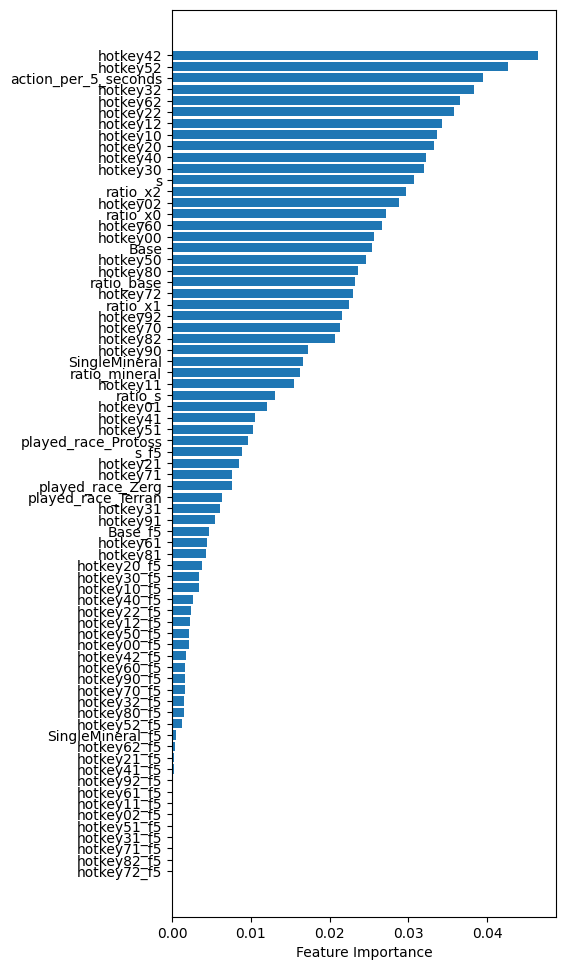

In [102]:
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.xlabel('Feature Importance')
# Adjust spacing to avoid overlapping labels
plt.subplots_adjust(left=0.35, right=0.95, top=1.9, bottom=0.01)
plt.show()

In [104]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Step 1: Encode target variable using LabelEncoder
le = LabelEncoder()
y_train2 = le.fit_transform(y_train)
y_test2 = le.transform(y_test)  # Encode test labels using the same encoder


# Step 7: Perform feature selection using RFECV with LogisticRegression
logreg = LogisticRegression(max_iter=10000)
rfe2 = RFECV(estimator=logreg, cv=2, scoring='f1_macro')  # Using f1_macro for multiclass
rfe2.fit(X_train, y_train2)  # Fit the model using the encoded y_train

/Users/sofialtman/ML/OT02---Data-Mining/.venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


RFECV(cv=2, estimator=LogisticRegression(max_iter=10000), scoring='f1_macro')

In [113]:
selected_features = features[rfe2.support_]
print("Selected Features:", selected_features)


Feature Ranking: [ 2 16 24  1  1  8  1  1  3 18 26  1  1 10  1  4 13  1  9 22  1 12 25  1
 17 21  1 15 27  1 20 28  1 23 29  1 19 30  1  1  1  1  1  1  1  1  1  1
  1  5  1  1  1  1  1  6  1  1  1  1  1 11  7  1 14  1  1  1  1  1  1  1
  1]
Selected Features: Index(['action_per_5_seconds', 'ratio_x0', 'ratio_x2', 'Base', 'hotkey02',
       'hotkey10', 'hotkey12', 'hotkey22', 'hotkey32', 'hotkey42', 'hotkey52',
       'hotkey62', 'hotkey72', 'hotkey82', 'hotkey92', 's', 'hotkey00_f5',
       'hotkey02_f5', 'hotkey10_f5', 'hotkey11_f5', 'hotkey12_f5',
       'hotkey20_f5', 'hotkey21_f5', 'hotkey22_f5', 'hotkey30_f5',
       'hotkey32_f5', 'hotkey40_f5', 'hotkey41_f5', 'hotkey42_f5',
       'hotkey50_f5', 'hotkey52_f5', 'hotkey60_f5', 'hotkey61_f5',
       'hotkey62_f5', 'hotkey70_f5', 'hotkey80_f5', 'hotkey90_f5',
       'hotkey92_f5', 's_f5', 'Base_f5', 'SingleMineral_f5',
       'played_race_Protoss', 'played_race_Terran', 'played_race_Zerg'],
      dtype='object')


## Testing

In [114]:
# Initialize the RandomForestClassifier with 50 estimators for faster computation (adjust later if needed)
model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')

# Prepare data: Drop target variable 'battleneturl' (unique ID) and assign it as the target variable

data_filter = data[['action_per_5_seconds', 'ratio_x0', 'ratio_x2', 'Base', 'hotkey02',
       'hotkey10', 'hotkey12', 'hotkey22', 'hotkey32', 'hotkey42', 'hotkey52',
       'hotkey62', 'hotkey72', 'hotkey82', 'hotkey92', 's', 'hotkey00_f5',
       'hotkey02_f5', 'hotkey10_f5', 'hotkey11_f5', 'hotkey12_f5',
       'hotkey20_f5', 'hotkey21_f5', 'hotkey22_f5', 'hotkey30_f5',
       'hotkey32_f5', 'hotkey40_f5', 'hotkey41_f5', 'hotkey42_f5',
       'hotkey50_f5', 'hotkey52_f5', 'hotkey60_f5', 'hotkey61_f5',
       'hotkey62_f5', 'hotkey70_f5', 'hotkey80_f5', 'hotkey90_f5',
       'hotkey92_f5', 's_f5', 'Base_f5', 'SingleMineral_f5',
       'played_race_Protoss', 'played_race_Terran', 'played_race_Zerg']]
X = data_filter  # Features
y = data['battleneturl']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Print the shape of X and y to ensure everything is set up properly
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (3044, 44)
y shape: (3044,)


In [115]:
# Print F1 Score
from sklearn.metrics import f1_score

# Compute F1 score with the appropriate average for multiclass classification
f1 = f1_score(y_test, y_pred, average='weighted')  # Or 'macro' or 'micro'

print("F1 Score with selected features: ", f1)

F1 Score with selected features:  0.8546940378606258
